In [1]:
import torch.nn as nn
import torch.optim as optim

from utils.data import get_dataloaders
from utils.train import train, test, get_device, set_seed
from utils.vis import get_predictions_examples
from model.ViT import VisionTransformer

In [2]:
get_device()

device(type='mps')

In [3]:
set_seed(42)

42

In [4]:
train_loader, test_loader = get_dataloaders(train_loader_batch_size=64, test_loader_batch_size=64)
len(train_loader), len(test_loader)

(938, 157)

In [5]:
model = VisionTransformer(
    img_size=28,
    patch_size=4,  # 28x28 images divide the image into 4x4 patches
    in_channels=1,
    n_classes=10,  # 10 categories
    embed_dim=256,
    depth=4,  # number of transformer layers
    n_heads=8,  # number of attention heads
    mlp_ratio=4.0,  # hidden dim ratio
    dropout=0.1,  # dropout rate
)
model

VisionTransformer(
  (patch_embed): PatchEmbedding(
    (proj): Conv2d(1, 256, kernel_size=(4, 4), stride=(4, 4))
  )
  (transformer): TransformerEncoder(
    (layers): ModuleList(
      (0-3): 4 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
        )
        (linear1): Linear(in_features=256, out_features=1024, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=1024, out_features=256, bias=True)
        (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
  (head): Linear(in_features=256, out_features=10, bias=True)
)

In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=0.03)
criterion, optimizer

(CrossEntropyLoss(),
 Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     lr: 0.0001
     maximize: False
     weight_decay: 0.03
 ))

In [7]:
train(model, train_loader, criterion, optimizer, epochs=5)

Epoch [1/5], Step [93/938], Loss: 1.9130
Epoch [1/5], Step [186/938], Loss: 1.5298
Epoch [1/5], Step [279/938], Loss: 1.3556
Epoch [1/5], Step [372/938], Loss: 1.2463
Epoch [1/5], Step [465/938], Loss: 1.2255
Epoch [1/5], Step [558/938], Loss: 1.1817
Epoch [1/5], Step [651/938], Loss: 1.1122
Epoch [1/5], Step [744/938], Loss: 1.1103
Epoch [1/5], Step [837/938], Loss: 1.0502
Epoch [1/5], Step [930/938], Loss: 1.0357
Epoch [2/5], Step [93/938], Loss: 1.0162
Epoch [2/5], Step [186/938], Loss: 0.9620
Epoch [2/5], Step [279/938], Loss: 0.9785
Epoch [2/5], Step [372/938], Loss: 0.9294
Epoch [2/5], Step [465/938], Loss: 0.8933
Epoch [2/5], Step [558/938], Loss: 0.9009
Epoch [2/5], Step [651/938], Loss: 0.8882
Epoch [2/5], Step [744/938], Loss: 0.8658
Epoch [2/5], Step [837/938], Loss: 0.8779
Epoch [2/5], Step [930/938], Loss: 0.8502
Epoch [3/5], Step [93/938], Loss: 0.8545
Epoch [3/5], Step [186/938], Loss: 0.8482
Epoch [3/5], Step [279/938], Loss: 0.8279
Epoch [3/5], Step [372/938], Loss: 0.

(VisionTransformer(
   (patch_embed): PatchEmbedding(
     (proj): Conv2d(1, 256, kernel_size=(4, 4), stride=(4, 4))
   )
   (transformer): TransformerEncoder(
     (layers): ModuleList(
       (0-3): 4 x TransformerEncoderLayer(
         (self_attn): MultiheadAttention(
           (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
         )
         (linear1): Linear(in_features=256, out_features=1024, bias=True)
         (dropout): Dropout(p=0.1, inplace=False)
         (linear2): Linear(in_features=1024, out_features=256, bias=True)
         (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
         (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
         (dropout1): Dropout(p=0.1, inplace=False)
         (dropout2): Dropout(p=0.1, inplace=False)
       )
     )
   )
   (norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
   (head): Linear(in_features=256, out_features=10, bias=True)
 ),
 [1.274327616066312

In [8]:
test(model, test_loader, criterion)

Accuracy of the network on the 10000 test images: 73.43%
Test Loss: 0.6879


(73.43, 0.6878861680531957)

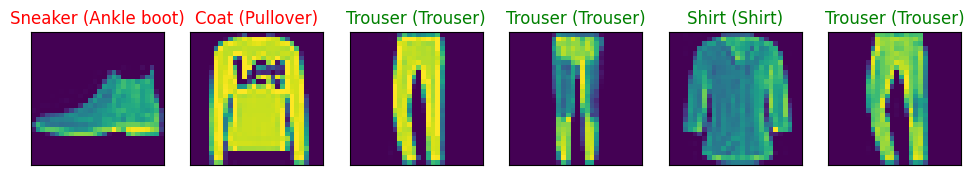

In [9]:
get_predictions_examples(model, test_loader)